In [212]:
import numpy as np
import matplotlib.pyplot as plt
import quandl

In [213]:
sequence_len = 30
n_hidden_layers = 10
learning_rate = 0.1
n_epochs = 20
f1 = 'relu'
f2 = 'tanh'
no_of_pred = 30

In [214]:
time_steps = []
data_book = []

In [215]:
import requests
data=requests.get('https://www.quandl.com/api/v3/datasets/WIKI/GOOGL/data.json?api_key=7DgMs7X9sQ-LNu1iHNFs')
temp=(data.json()['dataset_data']['data'])
# print(temp)
c=0
for i in temp:
    time_steps.append(c)
    data_book=[i[1]]+data_book
    c=c+1
print (data_book)
# with open("rocku1.csv") as f:
#     skip_line = True
#     for line in f.readlines():
# #         print(line)
#         if skip_line:
#             skip_line = False
#             continue
#         else:
#             line = line.strip().split(',')
#             time_steps.append(int(line[0]) - 1)
#             data_book.append(float(line[1]))


[100.01, 101.01, 110.76, 111.24, 104.76, 104.95, 108.1, 105.28, 102.32, 102.7, 99.09, 100.95, 101.01, 100.74, 102.5, 101.47, 106.63, 107.44, 110.56, 112.34, 114.42, 116.95, 120.2, 117.45, 118.84, 120.97, 119.56, 121.15, 126.53, 129.899, 130.8, 135.275, 134.66, 137.67, 136.56, 138.73, 137.01, 134.49, 143.24, 141.02, 144.95, 143.12, 150.5, 147.94, 144.13, 170.435, 176.28, 186.449, 182.509, 186.63, 198.87, 193.5, 198.73, 198.19, 188.25, 182.0, 170.86, 174.1, 170.67, 169.32, 185.23, 180.45, 174.39, 169.02, 170.4, 169.06, 168.6, 167.915, 174.84, 175.8, 180.255, 180.7, 181.77, 179.9, 180.0, 179.13, 176.0, 170.57, 170.25, 173.43, 172.03, 171.0, 177.99, 177.22, 176.76, 182.0, 186.28, 183.9, 187.45, 189.43, 192.11, 191.97, 192.97, 199.23, 197.4, 201.33, 193.45, 195.25, 190.64, 194.5, 195.62, 194.33, 195.38, 196.0, 200.89, 204.64, 192.58, 194.44, 188.69, 182.2, 179.27, 188.76, 190.13, 193.69, 194.38, 215.55, 205.99, 206.47, 205.26, 196.96, 200.76, 191.97, 186.66, 186.08, 193.605, 194.7, 197.83, 

In [216]:
mini = min(data_book)
maxi = max(data_book)
for i in range(len(data_book)):
    data_book[i] = (data_book[i] - mini) / (maxi - mini)
features = []
labels = []

for i in range(len(data_book) - sequence_len):
    features.append(data_book[i:i + sequence_len])
    labels.append(data_book[i+1:i + sequence_len + 1])


In [217]:
n_input_layers = 1
n_output_layers = 1





In [218]:
activation_f = {
    'identity': lambda f_x: f_x,
    'sigmoid': lambda f_x: 1.0 / (1.0 + np.exp(-f_x)),
    'tanh': lambda f_x: np.tanh(f_x),
    'arctan': lambda f_x: np.arctan(f_x),
    'relu': lambda f_x: f_x * (f_x > 0),
    'softplus': lambda f_x: np.log(1 + np.exp(f_x)),
    'sinusoid': lambda f_x: np.sin(f_x),
    'gaussian': lambda f_x: np.exp(-f_x * f_x)
}
activation_f_prime = {
    'identity': lambda f_dx: 1,
    'sigmoid': lambda f_dx: f_dx * (1.0 - f_dx),
    'tanh': lambda f_dx: 1.0 - f_dx**2,
    'arctan': lambda f_dx: 1.0 / (1.0 + np.tan(f_dx)**2),
    'relu': lambda f_dx: 1.0 * (f_dx > 0),
    'softplus': lambda f_dx: 1.0 - np.exp(-f_dx),
    'sinusoid': lambda f_dx: np.cos(np.arcsin(f_dx)),
    'gaussian': lambda f_dx: -2 * f_dx * np.sqrt(-np.log(f_dx))
}

In [219]:
act_f1 = activation_f[f1]
act_f2 = activation_f[f2]

act_f1_prime = activation_f_prime[f1]
act_f2_prime = activation_f_prime[f2]


In [220]:
V = np.random.normal(scale=0.1, size=(n_input_layers, n_hidden_layers))
W = np.random.normal(scale=0.1, size=(n_hidden_layers, n_output_layers))
R = np.random.normal(scale=0.1, size=(n_hidden_layers, n_hidden_layers))


In [221]:
print("############## TRAIN ##############")

# Training-set
X = features
Y = labels

# Epoch-training
for e in range(n_epochs):

    E = 0

    for i in range(len(X)):

        err = 0

        V_update = np.zeros_like(V)
        W_update = np.zeros_like(W)
        R_update = np.zeros_like(R)

        h_layers = [np.zeros((1, n_hidden_layers))]

        dels = []

        # Forward Pass
        for j in range(sequence_len):

            # Forward Prop
            x = np.array(X[i][j])
            y = np.array(Y[i][j])

            h_inter = np.dot(x, V) + np.dot(h_layers[-1], R)
            h_final = act_f1(h_inter)
            o_inter = np.dot(h_final, W)
            o_final = act_f2(o_inter)

            # Store hidden layer
            h_layers.append(h_final)

            err += (0.5 * np.square(y - o_final))[0][0]

            # Backward Prop
            del_h_o = -np.multiply(y - o_final, act_f2_prime(o_final))

            # Store delta
            dels.append(del_h_o)

            change_h_o = np.dot(h_final.T, del_h_o)
            W_update += change_h_o

        next_del = np.zeros(n_hidden_layers)

        # Backward Propagation through time
        for j in range(sequence_len):
            x = np.array(X[i][-j - 1])

            del_h = (np.dot(next_del, R.T) + np.dot(dels[-j - 1], W.T)
                     ) * act_f1_prime(h_layers[-j - 1])

            change_h_h = np.dot(h_layers[-j - 2].T, del_h)
            change_i_h = np.dot(x.T, del_h)

            R_update += change_h_h
            V_update += change_i_h

            next_del = del_h

        E += err / sequence_len

        # Adjust Weights
        V -= V_update * learning_rate
        W -= W_update * learning_rate
        R -= R_update * learning_rate

    print("Epoch: %d Error: %f" % (e, E / len(X)))


############## TRAIN ##############
Epoch: 0 Error: 0.000194
Epoch: 1 Error: 0.000097
Epoch: 2 Error: 0.000097
Epoch: 3 Error: 0.000096
Epoch: 4 Error: 0.000096
Epoch: 5 Error: 0.000096
Epoch: 6 Error: 0.000095
Epoch: 7 Error: 0.000095
Epoch: 8 Error: 0.000095
Epoch: 9 Error: 0.000099
Epoch: 10 Error: 0.000094
Epoch: 11 Error: 0.000104
Epoch: 12 Error: 0.000097
Epoch: 13 Error: 0.000095
Epoch: 14 Error: 0.000098
Epoch: 15 Error: 0.000100
Epoch: 16 Error: 0.000095
Epoch: 17 Error: 0.000102
Epoch: 18 Error: 0.000098
Epoch: 19 Error: 0.000097


############## TEST ##############


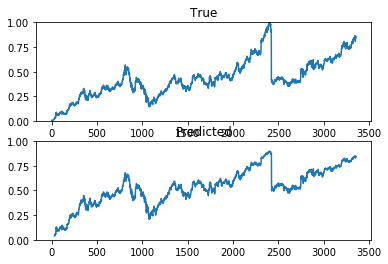

In [222]:
print("############## TEST ##############")

# Test-set
inp = features
test_result = []

# Start Test
for i in range(len(inp)):

    c = []

    h_layer = np.zeros((1, n_hidden_layers))

    for j in range(sequence_len):
        x = np.array(inp[i][j])

        # Forward prop
        h_inter = np.dot(x, V) + np.dot(h_layer, R)
        h_final = act_f1(h_inter)
        o_inter = np.dot(h_final, W)
        o_final = act_f2(o_inter)

        h_layer = h_final

        c.append(o_final)

    test_result.append(c[-1][0][0])

ax1 = plt.subplot(211)
plt.plot(time_steps, data_book)
plt.ylim(0.0, 1.0)
ax1.set_title("True")
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(time_steps[-len(test_result):], test_result)
plt.ylim(0.0, 1.0)
ax2.set_title("Predicted")
plt.show()


In [223]:
print("############## PREDICT ##############")

# Predict inp
inp = list(features[-1])
last_date = time_steps[-1]
to_be_passed=[]
# Start prediction
for i in range(no_of_pred):

    c = []

    h_layer = np.zeros((1, n_hidden_layers))

    for j in range(sequence_len):
        x = np.array(inp[j])

        # Forward prop
        h_inter = np.dot(x, V) + np.dot(h_layer, R)
        h_final = act_f1(h_inter)
        o_inter = np.dot(h_final, W)
        o_final = act_f2(o_inter)

        h_layer = h_final

        c.append(o_final)

    inp.append(c[-1][0][0])
    del inp[0]
    last_date = last_date + 1
    predict_op = c[-1][0][0] * (maxi - mini) + mini
    to_be_passed.append(predict_op)
    print("Day %d - Percentage Booking = %f" % (last_date, predict_op))

############## PREDICT ##############
Day 3356 - Percentage Booking = 1049.957009
Day 3357 - Percentage Booking = 1047.995734
Day 3358 - Percentage Booking = 1046.761369
Day 3359 - Percentage Booking = 1046.176204
Day 3360 - Percentage Booking = 1045.940023
Day 3361 - Percentage Booking = 1045.876254
Day 3362 - Percentage Booking = 1045.879613
Day 3363 - Percentage Booking = 1045.900237
Day 3364 - Percentage Booking = 1045.919005
Day 3365 - Percentage Booking = 1045.931293
Day 3366 - Percentage Booking = 1045.937902
Day 3367 - Percentage Booking = 1045.940859
Day 3368 - Percentage Booking = 1045.941879
Day 3369 - Percentage Booking = 1045.942045
Day 3370 - Percentage Booking = 1045.941926
Day 3371 - Percentage Booking = 1045.941767
Day 3372 - Percentage Booking = 1045.941648
Day 3373 - Percentage Booking = 1045.941577
Day 3374 - Percentage Booking = 1045.941543
Day 3375 - Percentage Booking = 1045.941529
Day 3376 - Percentage Booking = 1045.941525
Day 3377 - Percentage Booking = 1045.9